<a href="https://colab.research.google.com/github/KishoreR1/IrisKish/blob/main/LOgisticRegDryBean(Assgnmt)Kish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kishore2025","key":"9b12695bfa3a9e8c5629be73f2fdddcf"}'}

In [ ]:
# Step 2: Configure Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d nimapourmoradi/dry-bean-dataset-classification


Dataset URL: https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification
License(s): other


In [ ]:
!unzip dry-bean-dataset-classification.zip


Archive:  dry-bean-dataset-classification.zip
  inflating: Dry_Bean_Dataset.csv    


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Dry_Bean_Dataset.csv')

# Show first 5 rows
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


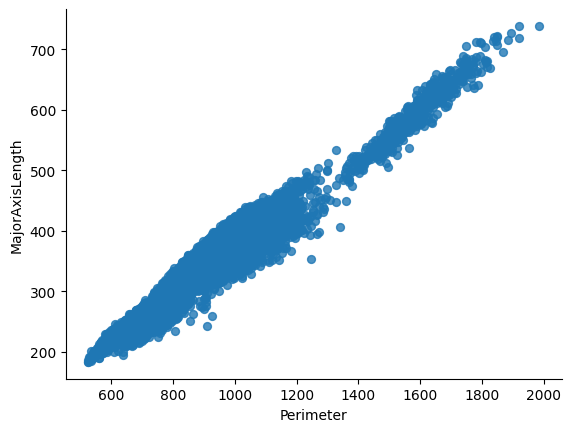

In [ ]:
# @title Perimeter vs MajorAxisLength

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Perimeter', y='MajorAxisLength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()           # Check columns and data types
df.isnull().sum()   # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


# **Data Exploration – Visualizing & Understanding the Dataset**

To understand the distribution and relationships between the features and the target class (Class), so that we:
* Know which features are important,
* Spot outliers or patterns,
* Decide how to prepare features for logistic regression.

**Let’s first see how many samples we have for each bean type (your target column is Class):**

In [ ]:
df['Class'].value_counts()


,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


**Class Distribution Insight Above:
We are dealing with a multiclass classification problem (7 different bean types).
Some classes like DERMASON have many more examples than others like BOMBAY.
This is called class imbalance — we will handle it later when training the model.
Logistic Regression still works for multiclass problems — using a technique called One-vs-Rest (OvR), which sklearn handles automatically.

**Visualization**

<ipython-input-9-4a98db310411>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='viridis')


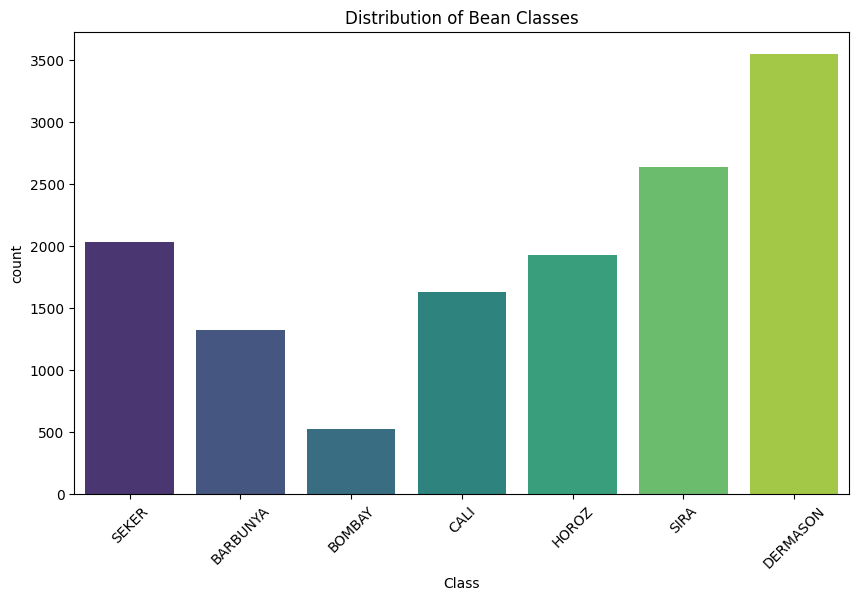

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Class', palette='viridis')
plt.title('Distribution of Bean Classes')
plt.xticks(rotation=45)
plt.show()


**Visualize Feature Distributions**
Let us now look at histograms to understand the shape of each feature —
which helps us to Detect outliers,See if data is skewed, understand feature range and scaling needs.

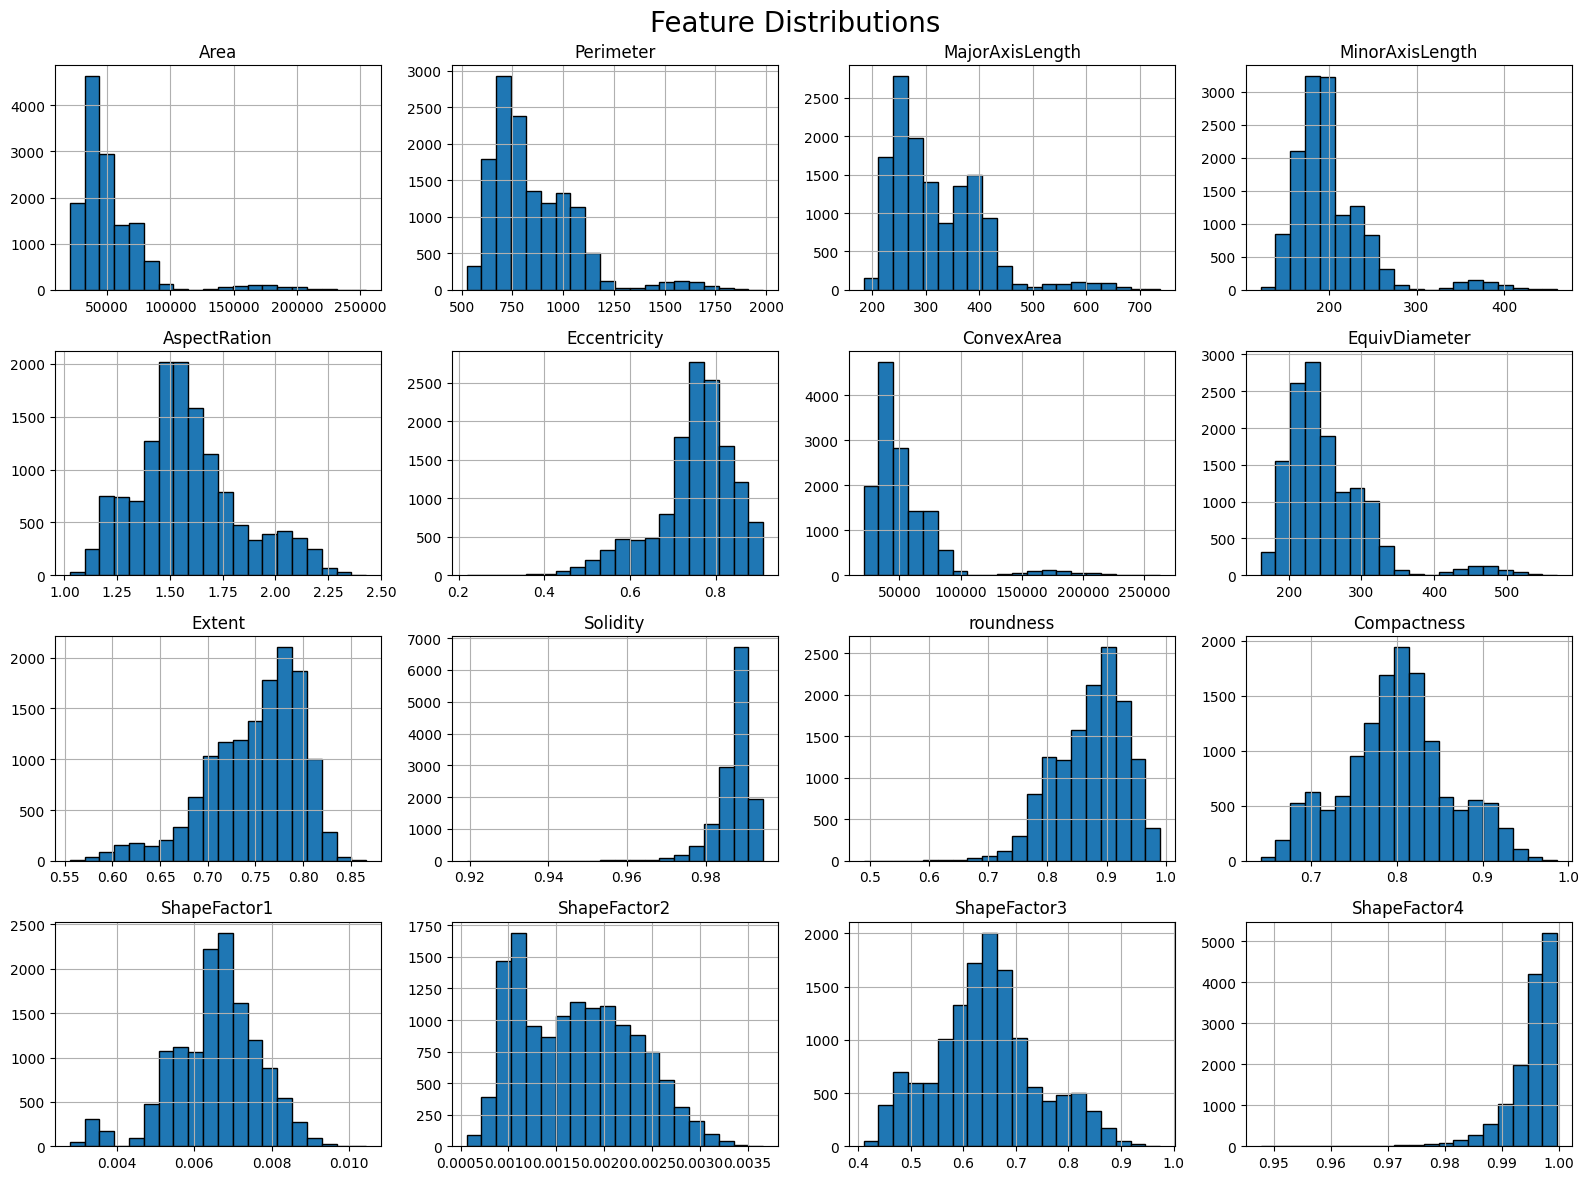

In [ ]:
df.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()


**Logistic regression uses mathematical weights, and if one feature has a much larger scale than another, it can unfairly dominate the result.
That’s why we will scale all features later using something like StandardScaler**

The features have different ranges → we must scale before training.
There’s no missing data!
We’ll keep all features for now unless correlation suggests otherwise.


#**Correlation Matrix**
To understand how the numerical features relate to each other. This helps us:
Detect features that are highly correlated (e.g., Area & Perimeter),
Identify redundant features (if two features provide the same info),
Help us during feature selection or dimensionality reduction (optional).

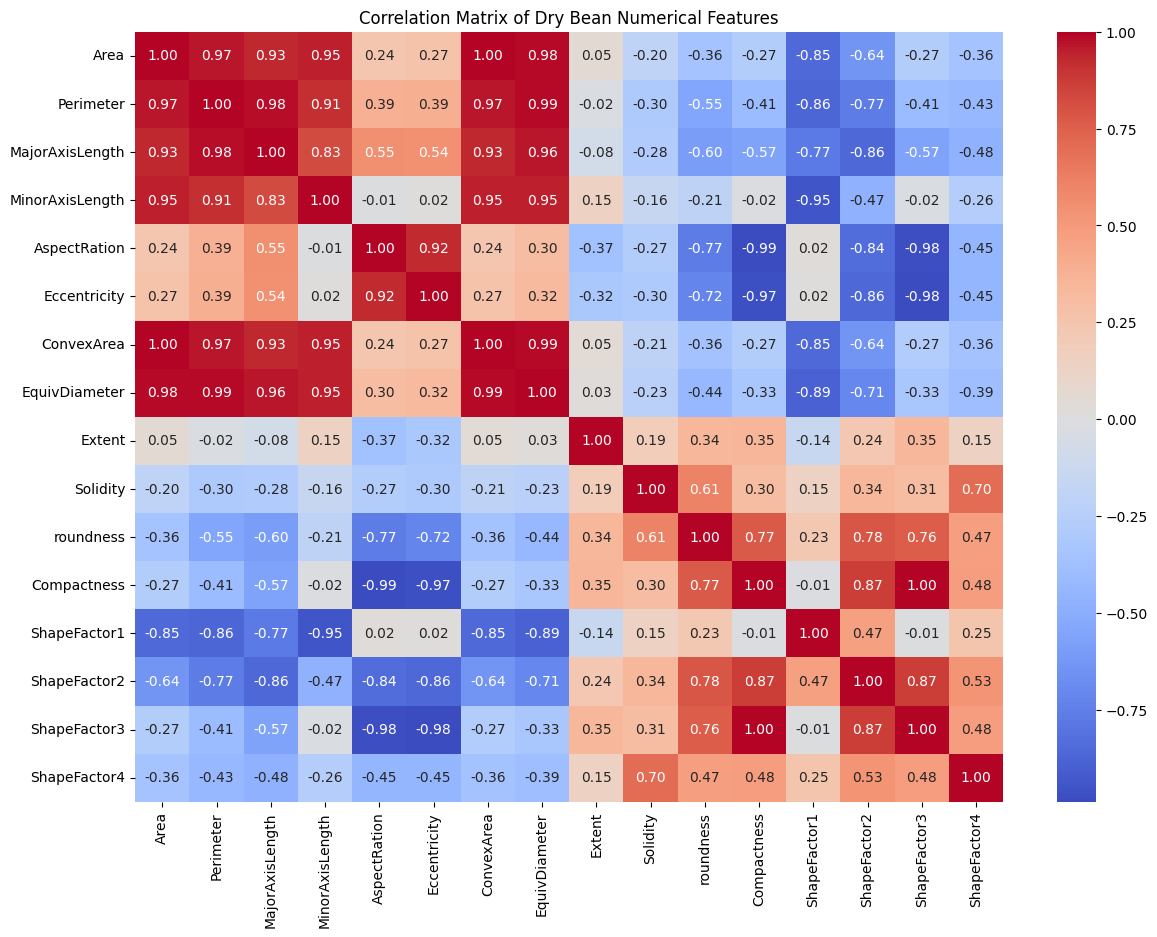

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop('Class', axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of Dry Bean Numerical Features")
plt.show()


**Logistic Regression**
When two features are too similar, like Area and ConvexArea, logistic regression might get confused. This is called multicollinearity.
We don’t have to drop features now, but we know these pairs are giving almost the same information — so we may:
Drop one,
Or keep them both and regularize them later.



#**Label Encode the Class Column:**
The Class column is your target output.
It has string values like 'SEKER', 'BOMBAY', etc.
Machine learning models like Logistic Regression need numeric labels, not strings.
We’ll use LabelEncoder to convert those strings to numbers.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoder object
label_encoder = LabelEncoder()

# Encode the 'Class' column
df['Class'] = label_encoder.fit_transform(df['Class'])

# View the first few values after encoding
df['Class'].head()


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

# Load the dataset again
df = pd.read_csv('Dry_Bean_Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Dry_Bean_Dataset.csv'

In [ ]:
!kaggle datasets download -d nimapourmoradi/dry-bean-dataset-classification


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!unzip dry-bean-dataset-classification.zip


unzip:  cannot find or open dry-bean-dataset-classification.zip, dry-bean-dataset-classification.zip.zip or dry-bean-dataset-classification.zip.ZIP.


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kishore2025","key":"9b12695bfa3a9e8c5629be73f2fdddcf"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d nimapourmoradi/dry-bean-dataset-classification
!unzip dry-bean-dataset-classification.zip


Dataset URL: https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification
License(s): other
Archive:  dry-bean-dataset-classification.zip
  inflating: Dry_Bean_Dataset.csv    


In [ ]:
import pandas as pd
df = pd.read_csv('Dry_Bean_Dataset.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])


#**Logistic Regression works best when all features are on a similar scale (e.g., 0 to 1 or standard normal)**
This ensures no feature dominates others due to its scale.
We’ll use StandardScaler, which transforms each feature to have:

Mean = 0

Standard deviation = 1

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target

# Create the scaler object
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


#**Train-Test Split**

We need to:
Train the model on one part of the data (training set)
Test its performance on new, unseen data (test set)

We’ll split the data 80% for training, 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (10888, 16)
Test set size: (2723, 16)


#**Logistic Regression Model Construction**
Goal:
Now, we’ll train a multiclass logistic regression model using the training data.

scikit-learn's LogisticRegression supports multiclass classification by default (it uses a strategy called one-vs-rest).

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create model with default settings
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

#**Model Evaluation**
Goal:
We’ll use the test set (X_test, y_test) to:

Predict labels using the trained model

Compare predictions with actual values

Measure performance using multiple evaluation metrics

In [ ]:
# Predict on the test set
y_pred = log_reg.predict(X_test)


#**Classification Report**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Print overall accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Accuracy: 0.9151670951156813

Classification Report:

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.85      0.90       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.95      0.93       326
    DERMASON       0.92      0.89      0.91       709
       HOROZ       0.97      0.94      0.95       386
       SEKER       0.95      0.94      0.95       406
        SIRA       0.81      0.90      0.85       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



#**This report shows:**

Precision – How many predicted labels were correct for each class

Recall – How many actual samples were correctly identified

F1-score – Balance of precision and recall

Support – How many examples of each class exist in the test set

#**Confusion Matrix for Visual Insight**

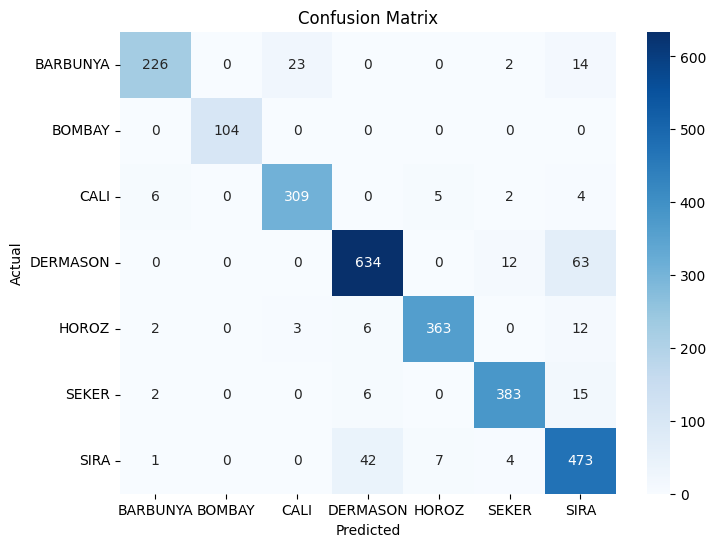

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Each row = actual class

Each column = predicted class

The diagonal values = correct predictions

| Class        | Correct Predictions | Notable Misclassifications                         |
| ------------ | ------------------- | -------------------------------------------------- |
| **BARBUNYA** | 226                 | 23 misclassified as CALI, 14 as SIRA               |
| **BOMBAY**   | 104                 | All correct                                       |
| **CALI**     | 309                 | Minor confusion with DERMASON, SEKER, SIRA         |
| **DERMASON** | 634                 | 63 predicted as SIRA, 12 as SEKER → some confusion |
| **HOROZ**    | 363                 | 12 confused with SIRA, 6 with DERMASON             |
| **SEKER**    | 383                 | 15 confused with SIRA                              |
| **SIRA**     | 473                 | 42 confused with DERMASON                          |


# Model performs very well overall — most classes are well-predicted.

Some classes like DERMASON, SIRA, SEKER are getting confused with each other → likely due to similar feature patterns.

BOMBAY is perfectly predicted — awesome!

#**Hyperparameter Tuning and Optimization**

#Logistic regression has hyperparameters like:

C – Regularization strength (how much the model tries to avoid overfitting)

solver – Algorithm used to optimize the weights

max_iter – Number of iterations for the solver to converge

Goal is to find the best combination of these that gives you the highest performance (accuracy/F1) without overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'multi_class': ['ovr']
}

# Create base model
log_reg = LogisticRegression(max_iter=1000)

# Create GridSearchCV object with 5-fold CV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'multi_class': 'ovr', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9207386851350604


| Hyperparameter | Value       | Meaning                                                                 |
| -------------- | ----------- | ----------------------------------------------------------------------- |
| `C`            | `10`        | Lower regularization → more flexible model (less penalty on complexity) |
| `solver`       | `liblinear` | Good for small to medium datasets                                       |
| `multi_class`  | `ovr`       | One-vs-Rest (default for binary/multiclass classification)              |


Trained a real-world multiclass classification model,

Tuned it using grid search + cross-validation,

And achieved ~92% cross-validation accuracy, which is excellent for a baseline logistic regression model!

**Evaluate the Optimized Model on the Test Set**

Now let’s use the best model from grid_search and evaluate it on the test set (real-world performance):

In [ ]:
# Use the best model found by GridSearch
best_model = grid_search.best_estimator_

# Predict on test data
y_pred_best = best_model.predict(X_test)

# Print accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))


Test Set Accuracy: 0.9151670951156813

Classification Report:

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.87      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.95      0.94       326
    DERMASON       0.92      0.89      0.91       709
       HOROZ       0.96      0.94      0.95       386
       SEKER       0.94      0.95      0.94       406
        SIRA       0.82      0.89      0.85       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



| Metric                  | Value                   |
| ----------------------- | ----------------------- |
| **Test Accuracy**       | **91.5%**               |
| **Cross-Val Acc**       | **92.1%**               |
| **Precision/Recall/F1** | All high across classes |


Class-wise Highlights:

BOMBAY: Perfect

SEKER, CALI, HOROZ: Very strong — 94–96% F1

SIRA: Still the trickiest one — but even here you got F1 = 85%, which is excellent for a first model!

#Model Performance Summary
**Test Set Accuracy:** 91.5%

The model correctly predicts the bean variety for 91.5% of the test samples, indicating strong overall performance.

Cross-Validation Accuracy: 92.1%
The cross-validation accuracy on training data is slightly higher, showing the model generalizes well without overfitting.